In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Part 1: K-mean clustering

1. Download any “*.jpeg” image to your local. Open and display it. Convert the image in to numpy array, so that i can be used in further processing. [Hint: Use PIL module from python]

(286, 800, 3)


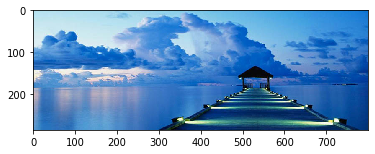

In [2]:
im = Image.open('jpeg2000-home.jpeg')

plt.imshow(im)
a = np.array(im)
print(a.shape)

2. Find out the dimensions of the image and convert it in to a two-dimensional array.

In [3]:
x = a.shape[0]*a.shape[1]
y = a.shape[2]
 
a.resize((x,y)) # a 2D array
print(a)

[[182 224 238]
 [182 224 238]
 [182 224 238]
 ...
 [  1  50 116]
 [  1  50 116]
 [  1  50 116]]


In [4]:
a.shape

(228800, 3)

3.Use k-means clustering with k set to 3 and cluster the image. [Hint: Refer to k-means module of scikit learn]

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(a)
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

4. Predict the cluster label of every pixel in the image and plot it back as an image.

In [6]:
y_kmeans = kmeans.predict(a)

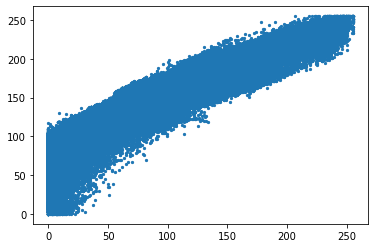

In [7]:
plt.scatter(a[:, 0], a[:, 1], s=5);

In [33]:
y_kmeans = kmeans.predict(a)

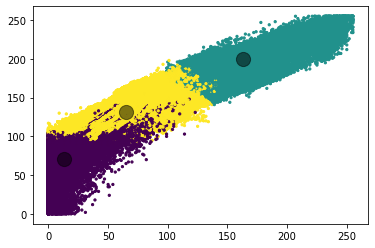

In [8]:
plt.scatter(a[:, 0], a[:, 1], c=y_kmeans, s=5, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

5. Find out the three dominant color in the image. [Hint: The cluster centers should correspond to three dominant colors]

In [9]:
centers

array([[ 12.86912314,  71.24009414, 135.42146101],
       [163.21053178, 199.42867522, 224.44254922],
       [ 64.86113184, 131.23556047, 200.39911841]])

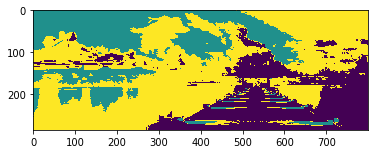

In [10]:
labels = kmeans.labels_
labels = labels.reshape((286, 800))
plt.imshow(labels)

In [11]:
data = a / 255.0 # use 0...1 scale
data = data.reshape(286*800, 3)
data.shape

(228800, 3)

In [12]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

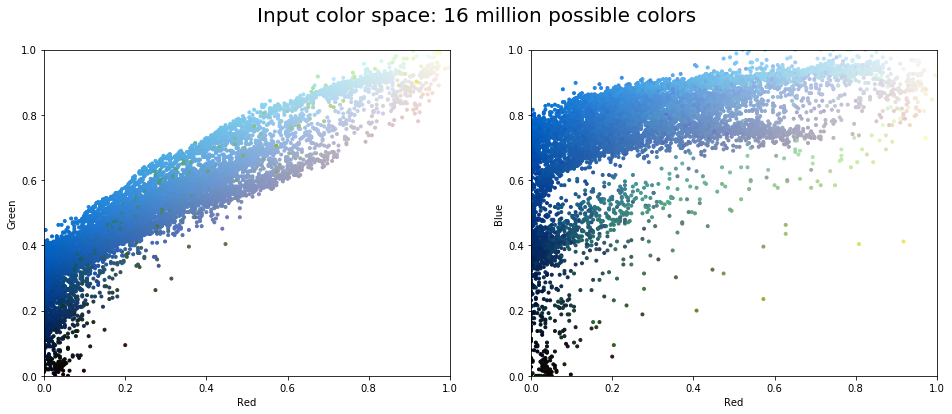

In [13]:
plot_pixels(data, title='Input color space: 16 million possible colors')

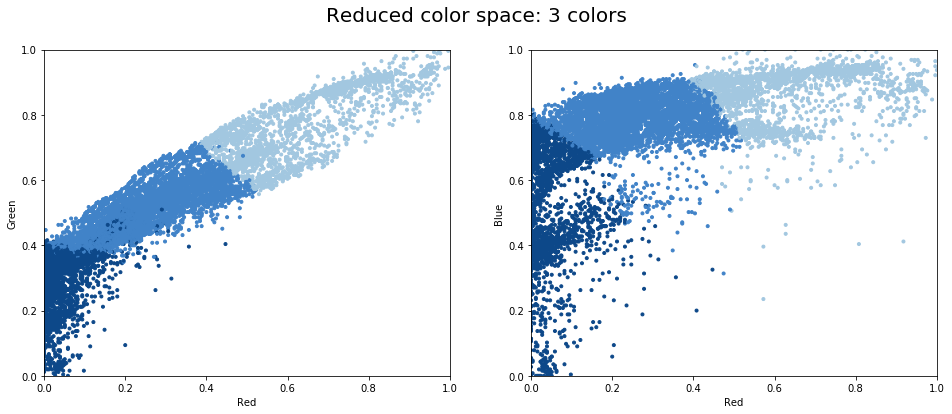

In [15]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(3)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 3 colors")

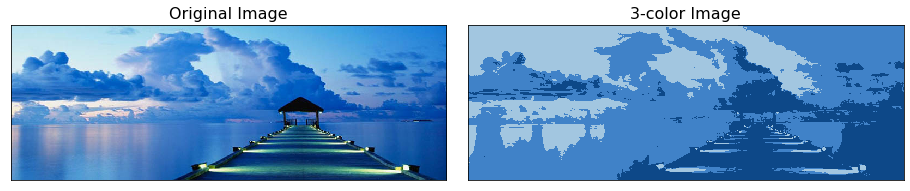

In [16]:
b = np.array(im)

im_recolored = new_colors.reshape(b.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(im)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(im_recolored)
ax[1].set_title('3-color Image', size=16);

## Part 2: Agglomerative Clustering

1. Load the file “zoo.data” and look at the info and first five rows. The first column denotes the animal name and the last one specifies a high-level class for the corresponding animal.

In [78]:
df = pd.read_csv('zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


2. Find out the unique number of high level class.

In [99]:
np.unique(df['class_type'])

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

3. Use the 16-intermediate feature and perform an agglomerative clustering.
[ Hint: Refer to the agglomerative clustering module in scikit learn and set the number of clusters appropriately]

In [83]:
from sklearn.cluster import AgglomerativeClustering

In [102]:
X = df.iloc[:, 1:]
X = X.iloc[:, :-1]
y = df.iloc[:,-1]

In [85]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0


In [104]:
clustering = AgglomerativeClustering(n_clusters=7).fit(X.values)

In [106]:
y_pred = clustering.labels_
y_pred

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 6, 0, 0, 3, 1, 2, 2, 3, 3,
       1, 3, 0, 5, 5, 4, 1, 4, 0, 1, 4, 3, 2, 1, 1, 3, 2, 0, 0, 3, 0, 3,
       1, 1, 0, 1, 1, 1, 1, 0, 5, 0, 1, 1, 3, 3, 3, 3, 2, 2, 6, 5, 1, 1,
       2, 1, 1, 1, 1, 3, 0, 2, 2, 4, 6, 6, 3, 3, 6, 6, 2, 3, 4, 0, 2, 3,
       0, 5, 5, 5, 2, 4, 1, 3, 4, 0, 1, 6, 3], dtype=int32)

In [107]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y.values, y_pred)

7.673267326732673

## Project: Automotive Domain

In [108]:
df = pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [109]:
len(np.unique(df['id']))

4000

In [110]:
len(df)

4000

In [112]:
df.drop('id', axis=1, inplace=True)
df.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


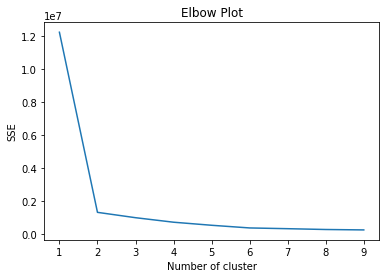

In [114]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    df['clusters'] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('Elbow Plot')
plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.show()

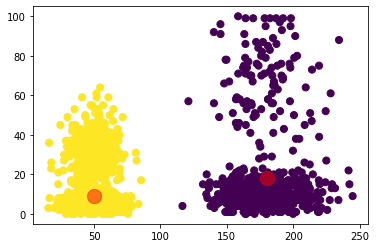

In [116]:
X = df.values
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5);